In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [ ]:
# files = os.listdir('data/data_spotify')
# data = pd.DataFrame()
# for f_name in files:
#   tmp = pd.read_csv('data/data_spotify/'+f_name)
#   frames = [data, tmp]
#   data = pd.concat(frames)

data = pd.read_csv('data/kaggle/KaggleData.csv')

print(data.shape)

(4081, 46)


In [ ]:
# E or I data processing
data_Ixxx = data[data['mbti'].isin([0,1,4,5,8,9,12,13])].assign(EorI=0)
data_Exxx = data[data['mbti'].isin([2,3,6,7,10,11,14,15])].assign(EorI=1)
frames = [data_Ixxx, data_Exxx]
data = pd.concat(frames)

# N or S data processing
data_xNxx = data[data['mbti'].isin([0,1,2,3,4,5,6,7])].assign(NorS=0)
data_xSxx = data[data['mbti'].isin([8,9,10,11,12,13,14,15])].assign(NorS=1)
frames = [data_xNxx, data_xSxx]
data = pd.concat(frames)

# T or F data processing
data_xxTx = data[data['mbti'].isin([0,1,2,3,8,10,12,14])].assign(TorF=0)
data_xxFx = data[data['mbti'].isin([4,5,6,7,9,11,13,15])].assign(TorF=1)
frames = [data_xxTx, data_xxFx]
data = pd.concat(frames)

# J or P data processing
data_xxxJ = data[data['mbti'].isin([0,2,4,6,8,9,10,11])].assign(JorP=0)
data_xxxP = data[data['mbti'].isin([1,3,5,7,12,13,14,15])].assign(JorP=1)
frames = [data_xxxJ, data_xxxP]
data = pd.concat(frames)

print(data_Ixxx.shape)
print(data_Exxx.shape)
print(data_xNxx.shape)
print(data_xSxx.shape)
print(data_xxTx.shape)
print(data_xxFx.shape)
print(data_xxxJ.shape)
print(data_xxxP.shape)
print(data.shape)

(2159, 47)
(1922, 47)
(2358, 48)
(1723, 48)
(2070, 49)
(2011, 49)
(1815, 50)
(2266, 50)
(4081, 50)


In [164]:
# EorI accuracy
X = data[['acousticness', 'instrumentalness', 'valence', 'loudness', 'danceability', 'energy' ]]
y = data[['EorI']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.47%


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# NorS accuracy
# X = data[['instrumentalness','speechiness']]
X = data[['acousticness', 'instrumentalness', 'valence']]
y = data[['NorS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.29%


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# TorF accuracy
X = data[['acousticness', 'instrumentalness', 'speechiness', 'valence', 'loudness']]
y = data[['TorF']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.73%


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# JorP accuracy
X = data[['acousticness', 'instrumentalness', 'speechiness', 'valence', 'loudness']]
y = data[['JorP']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.16%


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [86]:
# 4 types
data_kaggle = pd.read_csv('data/kaggle/KaggleData.csv')
print(data_kaggle.shape)
X = data_kaggle[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'instrumentalness']]
y = data_kaggle[['function_pair']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(4081, 46)
Accuracy: 34.61%


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#song feature of certain mbti visualization https://www.kaggle.com/code/monaamjad/eda-muna-top50

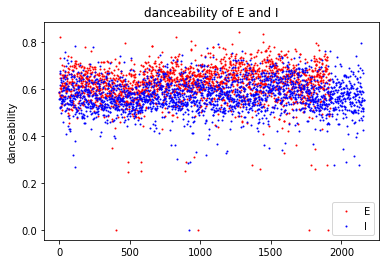

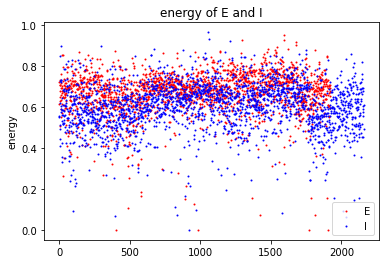

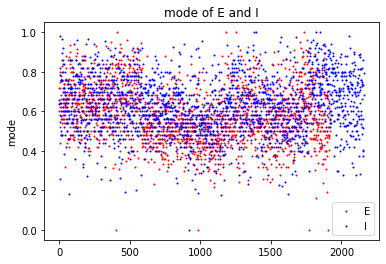

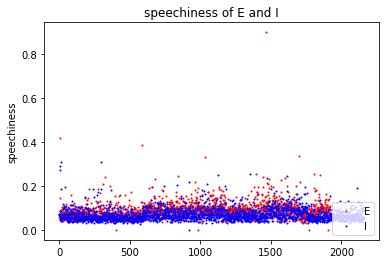

In [145]:
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np

##E or I

#danceability

e_dance = np.arange(len(data_Exxx['danceability']))
i_dance = np.arange(len(data_Ixxx['danceability']))
plt.scatter(e_dance, data_Exxx['danceability'], label='E', c='r', s=1)
plt.scatter(i_dance, data_Ixxx['danceability'], label='I', c='b', s=1)
plt.ylabel('danceability')
plt.title('danceability of E and I')
plt.legend(loc='lower right')
plt.show()

#energy

e_energy = np.arange(len(data_Exxx['energy']))
i_energy = np.arange(len(data_Ixxx['energy']))

plt.scatter(e_energy, data_Exxx['energy'], label='E', c='r', s=1)
plt.scatter(i_energy, data_Ixxx['energy'], label='I', c='b', s=1)
plt.ylabel('energy')
plt.title('energy of E and I')
plt.legend(loc='lower right')
plt.show()


# mode
e_mode = np.arange(len(data_Exxx['mode']))
i_mode = np.arange(len(data_Ixxx['mode']))
plt.scatter(e_mode, data_Exxx['mode'], label='E', c='r', s=1)
plt.scatter(i_mode, data_Ixxx['mode'], label='I', c='b', s=1)
plt.ylabel('mode')
plt.title('mode of E and I')
plt.legend(loc='lower right')
plt.show()

# speechiness
e_speechiness = np.arange(len(data_Exxx['speechiness']))
i_speechiness = np.arange(len(data_Ixxx['speechiness']))
plt.scatter(e_speechiness, data_Exxx['speechiness'], label='E', c='r', s=1)
plt.scatter(i_speechiness, data_Ixxx['speechiness'], label='I', c='b', s=1)
plt.ylabel('speechiness')
plt.title('speechiness of E and I')
plt.legend(loc='lower right')
plt.show()